# Naive Bayes - [Mobile Price Range Prediction]
## Problem Statement
### There is a new mobile company and the CEO wants to give a tough fight to big companies like Apple, Samsung etc. He has no idea of how to estimate the price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies. Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price
#
### Predict a price range, indicating how high the price is, using the Naive Bayes algorithm. 

### 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline

### 2. Importing Data

In [2]:
df=pd.read_csv('mobile_price.csv',)

df.index = np.arange(1, len(df)+1)

In [3]:
df.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [5]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


### 3. EDA

In [6]:
df.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
212,1049,1,2.2,0,9,0,63,0.5,135,5,...,199,1077,1022,11,3,13,0,0,0,0
1342,1974,0,0.5,1,9,0,10,0.8,145,6,...,530,1496,1433,6,1,17,0,0,0,1
1107,1396,0,2.4,1,0,0,46,0.1,138,7,...,1191,1347,2389,7,3,15,0,0,1,2
1067,1703,1,0.5,0,5,1,23,0.2,92,6,...,134,521,793,7,3,17,1,1,0,0
1356,1021,0,1.3,0,7,0,9,0.7,192,2,...,901,1793,1355,6,1,14,1,1,0,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
113,1310,1,1.1,1,13,0,7,1.0,194,5,...,117,513,3182,8,4,5,1,1,0,2
922,874,0,1.3,0,5,0,8,0.5,185,1,...,442,1248,582,6,4,15,0,0,0,0
432,1421,0,2.8,0,0,1,57,0.4,165,1,...,781,1657,2775,13,8,14,1,0,1,3
999,1777,1,3.0,0,3,0,20,0.6,188,6,...,511,616,3868,5,1,7,0,1,1,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='price_range', ylabel='count'>

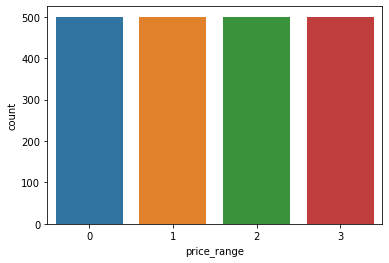

In [10]:
sns.countplot(x="price_range",data=df)

### Slightly Balanced Dataset

In [11]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

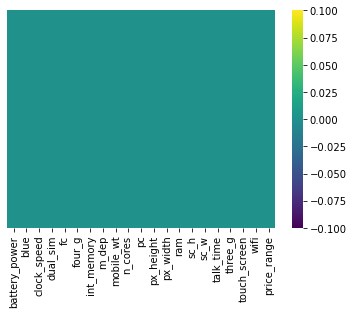

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

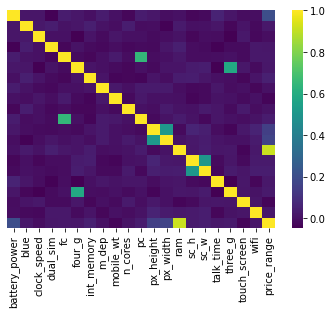

In [14]:
sns.heatmap(df.corr(),yticklabels=False,cmap="viridis")

In [15]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
df.shape

(2000, 21)

### Working On Outliers

In [17]:
def find_out(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

import numpy as np
bad_indexes = []
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        bad_indexes.append(find_out(df[col]))

bad_indexes = set(list(np.concatenate(bad_indexes).flat))
print(len(bad_indexes))

494


def find_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes
#----------------------
bad_indexes=[]
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(df, col)
        bad_indexes.extend(outlierindexes)
print(f"All Bad indexes:{bad_indexes}")   

In [18]:
from scipy import stats
data=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<AxesSubplot:xlabel='price_range', ylabel='count'>

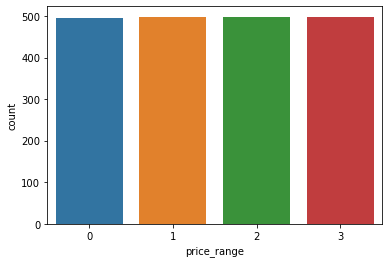

In [19]:
sns.countplot(x="price_range",data=data)

In [20]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [21]:
df=data.reset_index(drop=True)

In [22]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery_power'>

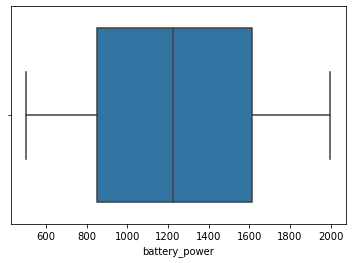

In [23]:
sns.boxplot(df['battery_power'])

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram'>

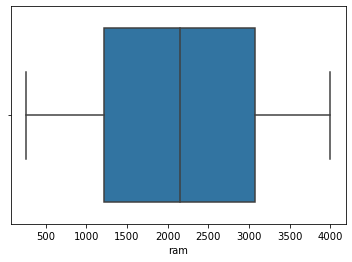

In [24]:
sns.boxplot(df['ram'])

In [25]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1984,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1985,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1986,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot:xlabel='talk_time', ylabel='count'>

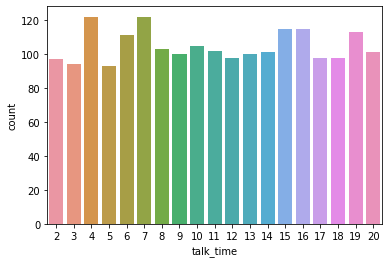

In [26]:
sns.countplot(x="talk_time",data=df)

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

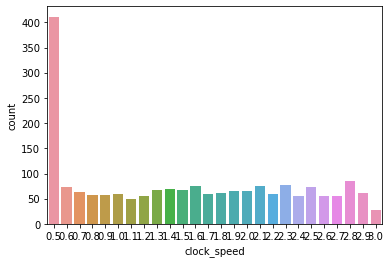

In [27]:
sns.countplot(x="clock_speed",data=df)

## See distribution for all numeric variables

In [28]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  21
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Number of Categorical features:  0


C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

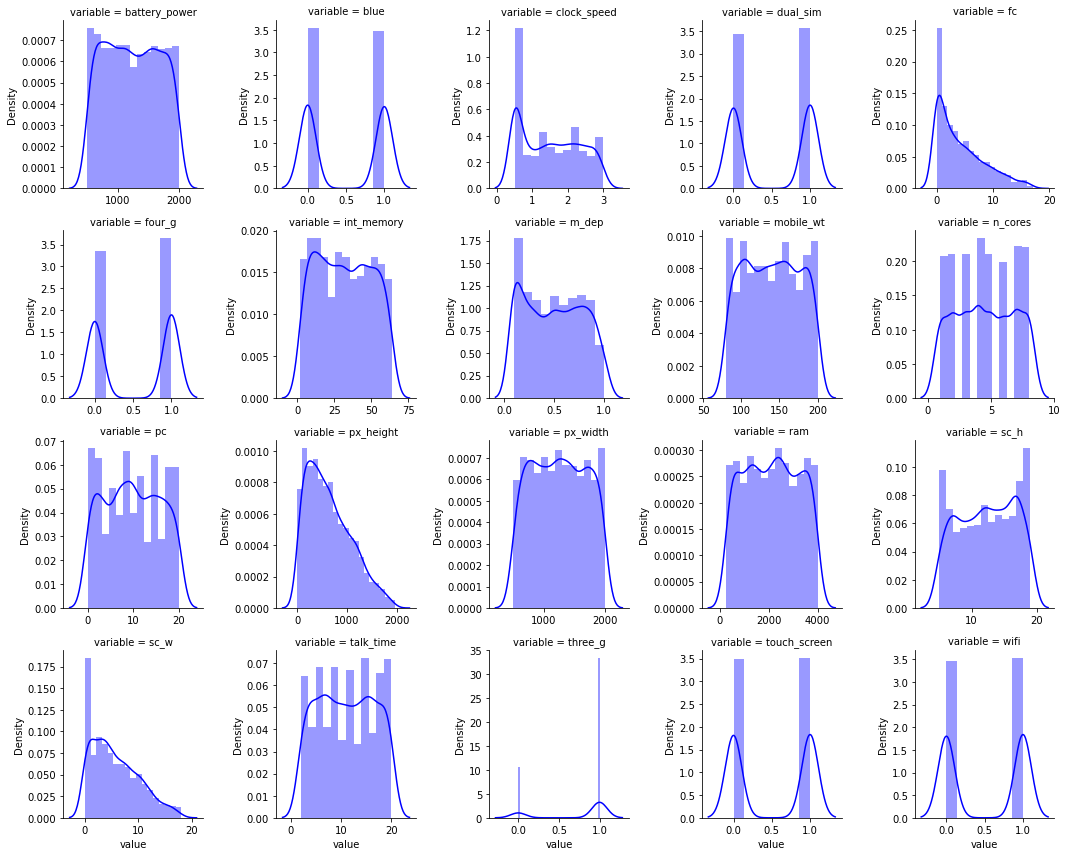

In [29]:
f = pd.melt(df, id_vars=['price_range'],value_vars= numerical_features[numerical_features != 'price_range'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue")

In [30]:
type(numerical_features)

pandas.core.indexes.base.Index

## Check distribution of Diagnosis with respect to variable values

In [31]:
# Generate a correlation matrix for all the numeric variables
corr=df[numerical_features].corr()
print(corr)

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.010642     0.010400 -0.043584  0.027604   
blue                0.010642  1.000000     0.020943  0.033370  0.006686   
clock_speed         0.010400  0.020943     1.000000 -0.001600 -0.000899   
dual_sim           -0.043584  0.033370    -0.001600  1.000000 -0.033168   
fc                  0.027604  0.006686    -0.000899 -0.033168  1.000000   
four_g              0.015361  0.014471    -0.043781  0.002273 -0.022978   
int_memory         -0.005253  0.038709     0.003663 -0.017661 -0.022539   
m_dep               0.035126  0.004250    -0.012685 -0.020364  0.001197   
mobile_wt           0.003008 -0.007430     0.012437 -0.006898  0.016304   
n_cores            -0.028340  0.037668    -0.006663 -0.024364 -0.008586   
pc                  0.028378 -0.008549    -0.005743 -0.018751  0.638544   
px_height           0.016925 -0.003262    -0.012015 -0.019028 -0.019003   
px_width           -0.005

In [32]:
corr=df.corr()["price_range"]
corr[np.argsort(corr)[::-1]]

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
fc               0.027334
sc_h             0.024294
three_g          0.023952
talk_time        0.020810
dual_sim         0.019325
wifi             0.018434
blue             0.018009
four_g           0.015254
n_cores          0.007159
m_dep           -0.001570
clock_speed     -0.006042
mobile_wt       -0.031180
touch_screen    -0.031501
Name: price_range, dtype: float64

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

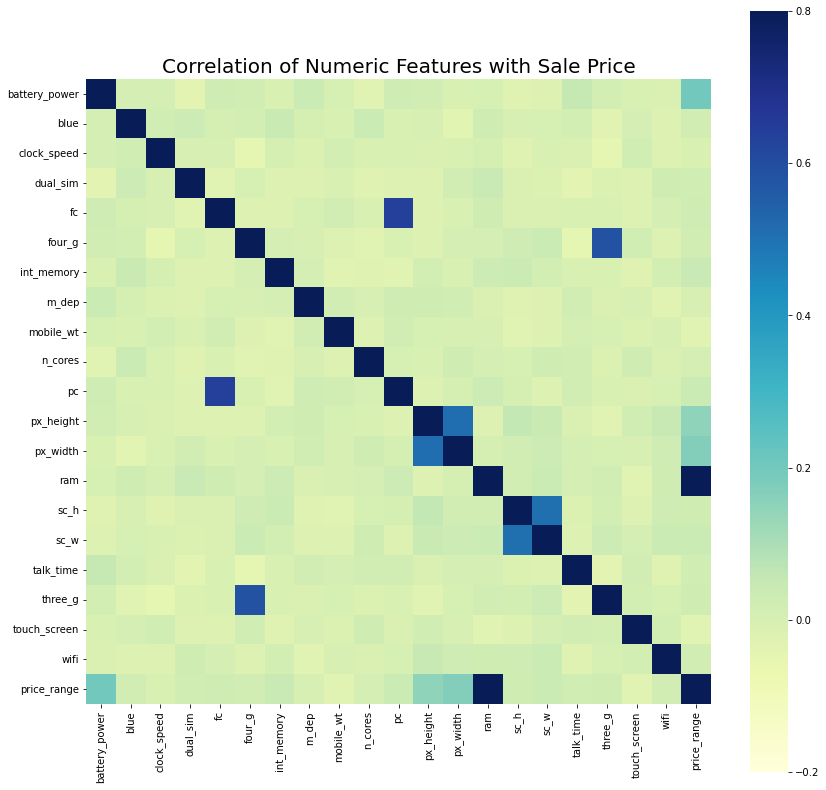

In [33]:
# Get correlation of numeric variables
df_numerical_features= df.select_dtypes(include=[np.number])

correlation= df_numerical_features.corr()
correlation["price_range"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,14))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=20)

# cmap - matplotlib colormap name or object - can be used to set the color options
# vmin & vmax is used to anchor the colormap
sns.heatmap(correlation, square= True, vmin=-0.2, vmax=0.8, cmap="YlGnBu")

<AxesSubplot:title={'center':'Correlation of Numeric Features with Diagnosis'}>

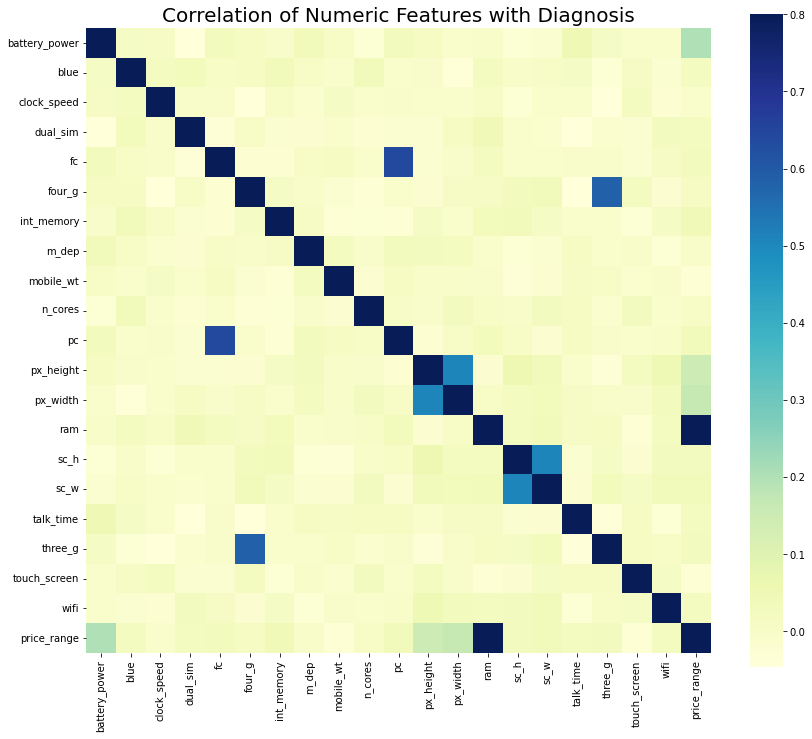

In [34]:
# Get correlation of numeric variables
numeric_features= df.select_dtypes(include= [np.number])

correlation= numeric_features.corr()
correlation["price_range"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Features with Diagnosis", y=1, size=20)
sns.heatmap(correlation, square= True, vmax=0.8, cmap="YlGnBu")

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'fc', 'sc_h', 'three_g', 'talk_time',
       'dual_sim', 'wifi', 'blue', 'four_g', 'n_cores', 'm_dep', 'clock_speed',
       'mobile_wt'],
      dtype='object')


<AxesSubplot:>

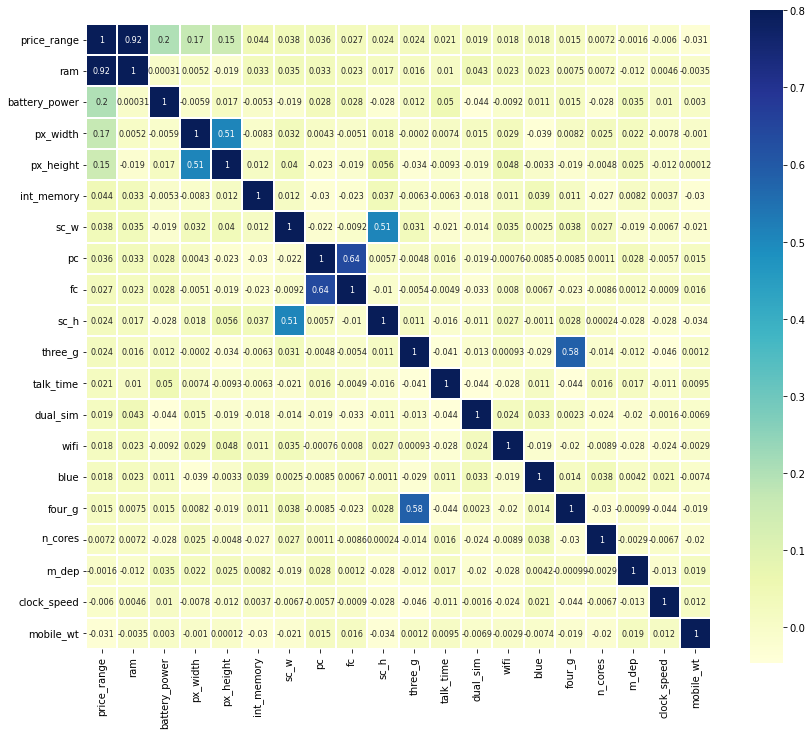

In [35]:
# Zoomed Heat Map
k= 20
cols = correlation.nlargest(k,'price_range')['price_range'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':8},yticklabels = cols.values)

# Pairplot of numeric variables
sns.set(style="ticks", color_codes=True)
columns= ['diagnosis', 'smoothness_se', 'fractal_dimension_mean', 'texture_se',
       'symmetry_se', 'id', 'fractal_dimension_se', 'concavity_se',
       'compactness_se', 'fractal_dimension_worst', 'symmetry_mean',
       'smoothness_mean', 'concave points_se', 'texture_mean',
       'symmetry_worst', 'smoothness_worst', 'texture_worst', 'area_se',
       'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean',
       'concavity_worst', 'concavity_mean', 'area_mean', 'radius_mean',
       'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean',
       'perimeter_worst', 'concave points_worst']
sns.pairplot(df[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20),(ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))= plt.subplots(nrows=15, ncols=2, figsize=(15,75))

sns.regplot(x=df['smoothness_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=df['fractal_dimension_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=df['texture_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=df['symmetry_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=df['fractal_dimension_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=df['concavity_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=df['compactness_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=df['fractal_dimension_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=df['symmetry_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=df['smoothness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax10)

sns.regplot(x=df['concave points_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax11)

sns.regplot(x=df['texture_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax12)

sns.regplot(x=df['symmetry_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax13)

sns.regplot(x=df['smoothness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax14)

sns.regplot(x=df['texture_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax15)

sns.regplot(x=df['area_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax16)

sns.regplot(x=df['perimeter_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax17)

sns.regplot(x=df['radius_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax18)

sns.regplot(x=df['compactness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax19)

sns.regplot(x=df['compactness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax20)

sns.regplot(x=df['concavity_worst'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax21)

sns.regplot(x=df['concavity_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax22)

sns.regplot(x=df['area_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax23)

sns.regplot(x=df['radius_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax24)

sns.regplot(x=df['area_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax25)

sns.regplot(x=df['perimeter_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax26)

sns.regplot(x=df['radius_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax27)

sns.regplot(x=df['concave points_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax28)

sns.regplot(x=df['perimeter_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax29)

sns.regplot(x=df['concave points_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax30)

plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['smoothness_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=df['fractal_dimension_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=df['texture_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=df['symmetry_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=df['fractal_dimension_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=df['concavity_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=df['compactness_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=df['fractal_dimension_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=df['symmetry_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=df['smoothness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax10)

plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['concave points_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax11)

sns.regplot(x=df['texture_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax12)

sns.regplot(x=df['symmetry_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax13)

sns.regplot(x=df['smoothness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax14)

sns.regplot(x=df['texture_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax15)

sns.regplot(x=df['area_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax16)

sns.regplot(x=df['perimeter_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax17)

sns.regplot(x=df['radius_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax18)

sns.regplot(x=df['compactness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax19)

sns.regplot(x=df['compactness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax20)

plt.show()

# Get the correlation plot of numeric variable with the target variable
fig, ((ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['concavity_worst'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax21)

sns.regplot(x=df['concavity_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax22)

sns.regplot(x=df['area_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax23)

sns.regplot(x=df['radius_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax24)

sns.regplot(x=df['area_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax25)

sns.regplot(x=df['perimeter_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax26)

sns.regplot(x=df['radius_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax27)

sns.regplot(x=df['concave points_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax28)

sns.regplot(x=df['perimeter_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax29)

sns.regplot(x=df['concave points_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax30)

plt.show()

## #1 With Standard Scaling

### 4.,5. X & Y

In [36]:
x=df.drop(labels='price_range',axis=1)
y=df[['price_range']]

In [37]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.90032683, -0.9909863 ,  0.83010389, ..., -1.78226558,
        -1.0050429 ,  0.98998974],
       [-0.49294227,  1.00909569, -1.2516853 , ...,  0.56108361,
         0.99498241, -1.01011148],
       [-1.53530052,  1.00909569, -1.2516853 , ...,  0.56108361,
         0.99498241, -1.01011148],
       ...,
       [ 1.53260104, -0.9909863 , -0.76185255, ...,  0.56108361,
         0.99498241, -1.01011148],
       [ 0.62452039, -0.9909863 , -0.76185255, ...,  0.56108361,
         0.99498241,  0.98998974],
       [-1.65592276,  1.00909569,  0.58518752, ...,  0.56108361,
         0.99498241,  0.98998974]])

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## #1.1 Gaussian Naive Bayes

### 6. Gaussian Naive Bayes Model Build

In [39]:
GNB = GaussianNB()

### 7. Fit

In [40]:
GNB.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

### 8. Accuracy

In [41]:
GNB.score(x_train,y_train)

0.8176100628930818

In [42]:
GNB.score(x_test,y_test)

0.7939698492462312

In [43]:
y_pred_train = GNB.predict(x_train)

In [44]:
y_pred_test = GNB.predict(x_test)

In [45]:
accuracy_score(y_train,y_pred_train)

0.8176100628930818

In [46]:
accuracy_score(y_test,y_pred_test)

0.7939698492462312

## #1.2 Bernoulli Naive Bayes

### 6. Bernoulli Naive Bayes Model Build

In [47]:
BNB=BernoulliNB()

### 7. Fit

In [48]:
BNB.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

### 8. Accuracy

In [49]:
BNB.score(x_train,y_train)

0.5918238993710692

In [50]:
BNB.score(x_test,y_test)

0.5402010050251256

## #1.3 Multinomial Naive Bayes

### 6. Multinomial Naive Bayes Model Build

In [51]:
MNB=MultinomialNB()

### 7. Fit

In [52]:
MNB.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Negative values in data passed to MultinomialNB (input X)

#### Can't proceed further with Multinomial Naive Bayes Model because Negative values in data passed to MultinomialNB (input X)

## #2 Without Scaling

### 4.,5. X & Y

In [55]:
x=df.drop(labels='price_range',axis=1)
y=df[['price_range']]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

## #2.1 Gaussian Naive B

### 6. Gaussian Naive Bayes Model Build

In [57]:
GNB = GaussianNB()

### 7. Fit

In [58]:
GNB.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

### 8. Accuracy

In [59]:
GNB.score(x_train,y_train)

0.8176100628930818

In [60]:
GNB.score(x_test,y_test)

0.7939698492462312

## #2.2 Bernoulli Naive Bayes

### 6. Bernoulli Naive Bayes Model Build

In [ ]:
ADB= AdaBoostClassifier(n_estimators=100)

### 7. Fit

In [ ]:
ADB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
ADB.score(x_train,y_train)

In [ ]:
ADB.score(x_test,y_test)

## #2.3 Gradient Boosting

### 6. Gradient Boosting Model Build

In [ ]:
GBM=GradientBoostingClassifier(n_estimators = 50)

### 7. Fit

In [ ]:
GBM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
GBM.score(x_train,y_train)

In [ ]:
GBM.score(x_test,y_test)

## #2.4 Extreme Gradient Boosting

### 6. Extreme Gradient Boosting Model Build

In [ ]:
XGB=xgb.XGBRegressor(n_estimators=50)

### 7. Fit

In [ ]:
XGB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
XGB.score(x_train,y_train)

In [ ]:
XGB.score(x_test,y_test)

### #3 With Min Max Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='diagnosis',axis=1)
y=df[['diagnosis']]

In [ ]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## #3.1 Bagging

### 6. Bagging Classifier Model Build

In [ ]:
BCM = BaggingClassifier( n_estimators=50)

### 7. Fit

In [ ]:
BCM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
BCM.score(x_train,y_train)

In [ ]:
BCM.score(x_test,y_test)

## #3.2 AdaBoost

### 6. AdaBoost Model Build

In [ ]:
ADB= AdaBoostClassifier(n_estimators=100)

### 7. Fit

In [ ]:
ADB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
ADB.score(x_train,y_train)

In [ ]:
ADB.score(x_test,y_test)

## #3.3 Gradient Boosting

### 6. Gradient Boosting Model Build

In [ ]:
GBM=GradientBoostingClassifier(n_estimators = 50)

### 7. Fit

In [ ]:
GBM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
GBM.score(x_train,y_train)

In [ ]:
GBM.score(x_test,y_test)

## #3.4 Extreme Gradient Boosting

### 6. Extreme Gradient Boosting Model Build

In [ ]:
XGB=xgb.XGBRegressor(n_estimators=50)

### 7. Fit

In [ ]:
XGB.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
XGB.score(x_train,y_train)

In [ ]:
XGB.score(x_test,y_test)

### With Robust Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [ ]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [ ]:
SVM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
SVM.score(x_train,y_train)

In [ ]:
SVM.score(x_test,y_test)

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

### Cross Validation

### Without Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

### 6. C[Finding the value of C]

from sklearn.model_selection import cross_val_score
from sklearn import metrics
C_Values=list(range(1,50,2))
cv_scores=[]
for k in C_Values:
    SVM = svm.SVC(kernel='linear',gamma='auto',C=k)
    scores=cross_val_score(SVM,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1-x for x in cv_scores]
MSE

optimal_k=C_Values[MSE.index(min(MSE))]
optimal_k

plt.plot(C_Values,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')